In [1]:
import pandas as pd
import os
import re
import plotly.express as px

# Chemin racine des données
base_dir = "data"
all_data = []

# Charger tous les fichiers CSV d'entraînement
for semaine in os.listdir(base_dir):
    semaine_path = os.path.join(base_dir, semaine)
    if os.path.isdir(semaine_path):
        for file in os.listdir(semaine_path):
            print(file)
            if file.endswith(".csv") and "Workout" in file:
                file_path = os.path.join(semaine_path, file)
                try:
                    df = pd.read_csv(file_path, encoding="utf-8")
                except UnicodeDecodeError:
                    try:
                        df = pd.read_csv(file_path, encoding="ISO-8859-1")
                    except Exception as e:
                        print(f"Erreur de lecture pour {file_path} : {e}")
                        continue
                df["semaine"] = semaine
                df["source"] = file
                all_data.append(df)

# # ✅ Fusion finale
# if all_data:
#     full_df = pd.concat(all_data, ignore_index=True)
#     print(f"\n✅ Total de fichiers concaténés : {len(all_data)}")
#     print(f"✅ Dimensions du DataFrame final : {full_df.shape}")
# else:
#     print("❌ Aucun fichier CSV valide trouvé.")

FJ1228_BP50206_FMA45097_Sesamoid bone of right foot.obj
FJ1232_BP50206_FMA45097_Sesamoid bone of right foot.obj
FJ1245_BP50167_FMA23725_Right trapezoid.obj
FJ1294_BP50244_FMA49051_Left inferior oblique.obj
FJ1295_BP50683_FMA49047_Left inferior rectus.obj
FJ1304_BP50389_FMA49055_Left lateral rectus.obj
FJ1306_BP50271_FMA49049_Left levator palpebrae superioris.obj
FJ1308_BP50597_FMA49057_Left medial rectus.obj
FJ1322_BP50440_FMA49053_Left superior oblique.obj
FJ1323_BP50611_FMA49045_Left superior rectus.obj
FJ1343_BP50155_FMA54159_Tendon of right levator palpebrae superioris.obj
FJ1345_BP50247_FMA49050_Right inferior oblique.obj
FJ1346_BP50608_FMA49046_Right inferior rectus.obj
FJ1355_BP50659_FMA49054_Right lateral rectus.obj
FJ1357_BP50265_FMA49048_Right levator palpebrae superioris.obj
FJ1359_BP50372_FMA49056_Right medial rectus.obj
FJ1373_BP50315_FMA49052_Right superior oblique.obj
FJ1374_BP50264_FMA49044_Right superior rectus.obj
FJ1383M_BP50412_FMA37718_First lumbrical of left foot.

In [2]:
# Nettoyage + plot
if all_data:
    full_df = pd.concat(all_data, ignore_index=True)
    full_df["date"] = pd.to_datetime(full_df["date"], errors='coerce')

    print(full_df)

    def extract_weight(value):
        if pd.isna(value):
            return None
        match = re.search(r'\d+\.?\d*', str(value))
        return float(match.group()) if match else None

    full_df["poids_num"] = full_df["total poids (kg)"].apply(extract_weight)

    # 🔍 Sélection d'un exercice spécifique
    selected_exercise = "Curl biceps banc incliné"
    filtered = full_df[full_df["exercices"] == selected_exercise]

    # 📊 Affichage du graphique
    fig = px.line(filtered, x='date', y='poids_num', markers=True,
                  title=f"Progression du poids pour : {selected_exercise}",
                  labels={"poids_num": "Poids (kg)", "date": "Date"})
    fig.update_layout(xaxis_title="Date", yaxis_title="Poids utilisé (kg)")
    fig.show()

else:
    print("❌ Aucun fichier CSV trouvé ou lisible dans les sous-dossiers.")

          date type sceance                        exercices  équipement  \
0   2025-03-17         legs                           Squats       barre   
1   2025-03-17         legs                  Fentes marchées  kettlebell   
2   2025-03-17         legs  Soulevé de terre jambes tendues       barre   
3   2025-03-17         legs                    Leg extension     machine   
4   2025-03-17         legs                   Ischio machine     machine   
..         ...          ...                              ...         ...   
100 2025-03-26         push                             Dips         PDC   
101 2025-03-26         push                          Pec fly     machine   
102 2025-03-26         push             Elevations latérales     haltère   
103 2025-03-26         push                 Triceps barre EZ    barre EZ   
104 2025-03-26         push             Triceps poulie corde      poulie   

     serie          rep total poids (kg)                sensation 3 mots  \
0        4 

h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning:

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.



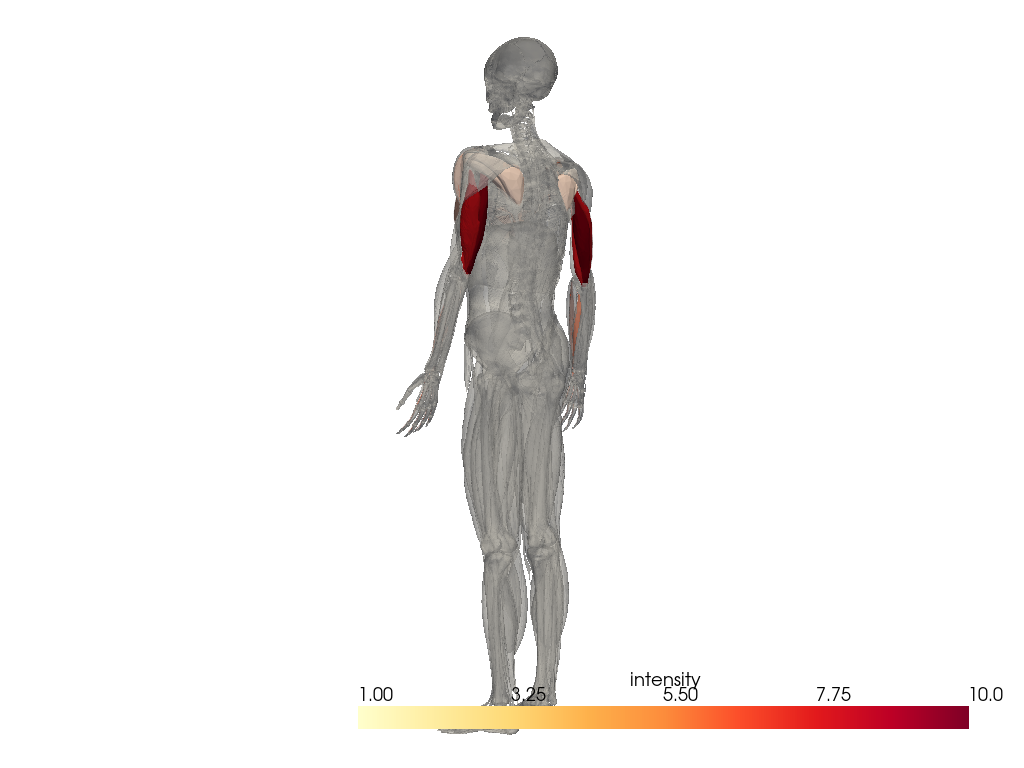

In [3]:
import pyvista as pv
import pandas as pd
import os
import numpy as np

# === PARAMÈTRES ===
folder_path = "data/body"
csv_path = "exercices_muscles_intensite.csv"
selected_exercice = "Triceps barre EZ"

# === Chargement des muscles ciblés par l'exercice ===
df = pd.read_csv(csv_path)
df["Intensite"] = pd.to_numeric(df["Intensite"], errors="coerce")
muscles = df[df["Exercice"] == selected_exercice][["Muscle", "Intensite"]]
muscle_map = {m: int(i) for m, i in zip(muscles["Muscle"], muscles["Intensite"])}

# === Création de la scène ===
plotter = pv.Plotter()
plotter.background_color = "white"

# Pour stocker les valeurs d’intensité réelles (1-10)
for file in os.listdir(folder_path):
    if file.endswith(".obj"):
        path = os.path.join(folder_path, file)
        try:
            mesh = pv.read(path)
            muscle_name = (
                file.split("_")[-1]
                .replace(".obj", "")
                .replace("right ", "")
                .replace("left ", "")
                .replace("Right ", "")
                .replace("Left ", "")
                .strip()
            )

            matched = next((m for m in muscle_map if m.lower() in muscle_name.lower()), None)
            if matched:
                intensity = muscle_map[matched]
                mesh["intensity"] = np.full(mesh.n_points, intensity)
                plotter.add_mesh(
                    mesh,
                    scalars="intensity",
                    # cmap="YlOrRd",
                    cmap="Reds",
                    opacity=1.0,
                    show_scalar_bar=False,
                    clim=[1, 10]  # 🔥 fixe l'échelle
                )
            else:
                plotter.add_mesh(mesh, color="lightgrey", opacity=0.5)

        except Exception as e:
            print(f"Erreur avec {file} : {e}")

# === Barre de couleur ===
dummy = pv.Sphere()
dummy["intensity"] = np.linspace(1, 10, dummy.n_points)
plotter.add_mesh(dummy, scalars="intensity", cmap="YlOrRd", show_scalar_bar=True, clim=[1, 10])

plotter.view_vector((1, 1, 0))
plotter.show()

h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning:

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.



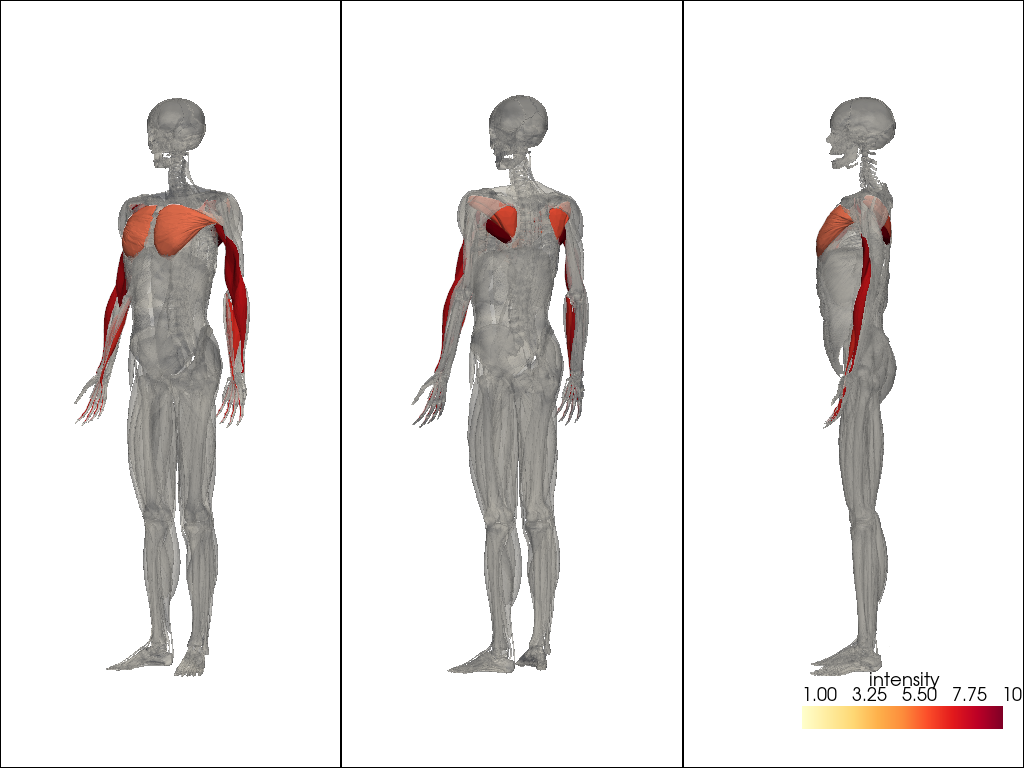

In [4]:
import pyvista as pv
import pandas as pd
import os
import numpy as np

# === PARAMÈTRES ===
folder_path = "data/body"
csv_path = "exercices_muscles_intensite.csv"
selected_exercice = "Tractions"

# === Chargement des muscles ciblés par l'exercice ===
df = pd.read_csv(csv_path)
df["Intensite"] = pd.to_numeric(df["Intensite"], errors="coerce")
muscles = df[df["Exercice"] == selected_exercice][["Muscle", "Intensite"]]
muscle_map = {m: int(i) for m, i in zip(muscles["Muscle"], muscles["Intensite"])}

# === Fonction pour charger les meshes ===
def load_meshes():
    meshes = []
    for file in os.listdir(folder_path):
        if file.endswith(".obj"):
            path = os.path.join(folder_path, file)
            try:
                mesh = pv.read(path)
                muscle_name = (
                    file.split("_")[-1]
                    .replace(".obj", "")
                    .replace("right ", "")
                    .replace("left ", "")
                    .replace("Right ", "")
                    .replace("Left ", "")
                    .strip()
                )
                matched = next((m for m in muscle_map if m.lower() in muscle_name.lower()), None)
                if matched:
                    intensity = muscle_map[matched]
                    mesh["intensity"] = np.full(mesh.n_points, intensity)
                    meshes.append((mesh, True))
                else:
                    meshes.append((mesh, False))
            except Exception as e:
                print(f"Erreur avec {file} : {e}")
    return meshes

# === Création du plotter avec 3 vues ===
plotter = pv.Plotter(shape=(1, 3), border=True)
plotter.background_color = "white"

# === Chargement des meshes une seule fois ===
meshes = load_meshes()

# === Caméras pour les 3 vues ===
views = [
    (0.8, -1, 0),  # face
    (0.8, 1, 0),   # dos
    (1, 0, 0)    # profil
]

# === Affichage dans les 3 sous-fenêtres ===
for i in range(3):
    plotter.subplot(0, i)
    for mesh, is_target in meshes:
        if is_target:
            plotter.add_mesh(
                mesh,
                scalars="intensity",
                cmap="Reds",
                opacity=1.0,
                show_scalar_bar=False,
                clim=[1, 10]
            )
        else:
            plotter.add_mesh(mesh, color="lightgrey", opacity=0.5)
    plotter.view_vector(views[i])
    plotter.camera.zoom(1.8)  # 🔍 Zoom 180%

# === Ajouter une colorbar visible à part ===
dummy = pv.Sphere()
dummy["intensity"] = np.linspace(1, 10, dummy.n_points)
plotter.subplot(0, 2)  # Afficher dans la dernière vue
plotter.add_mesh(dummy, scalars="intensity", cmap="YlOrRd", show_scalar_bar=True, clim=[1, 10])

plotter.show()
